In [1]:
#Python Notebooks - Changing work directory
import os

# get the current working directory
cwd = os.getcwd()

# traverse up the directory tree until we find the project root
while not os.path.isfile(os.path.join(cwd, '.gitignore')):
    cwd = os.path.dirname(cwd)

# set the working directory to the project root
os.chdir(cwd)

# Imports

In [2]:
from dotenv import load_dotenv
from src.functions import *

# Base Functionality (No Pins)

Retrieving elevation data: 100%|██████████| 282/282 [01:17<00:00,  3.63rows/s]


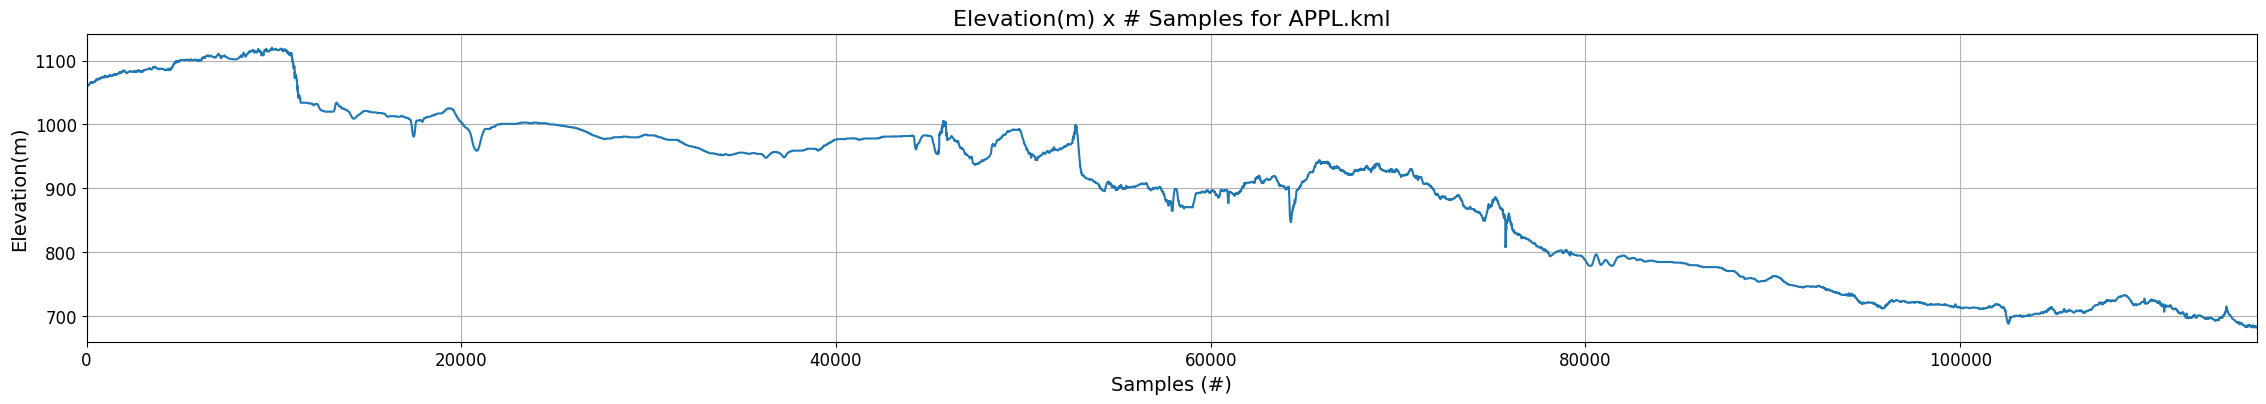

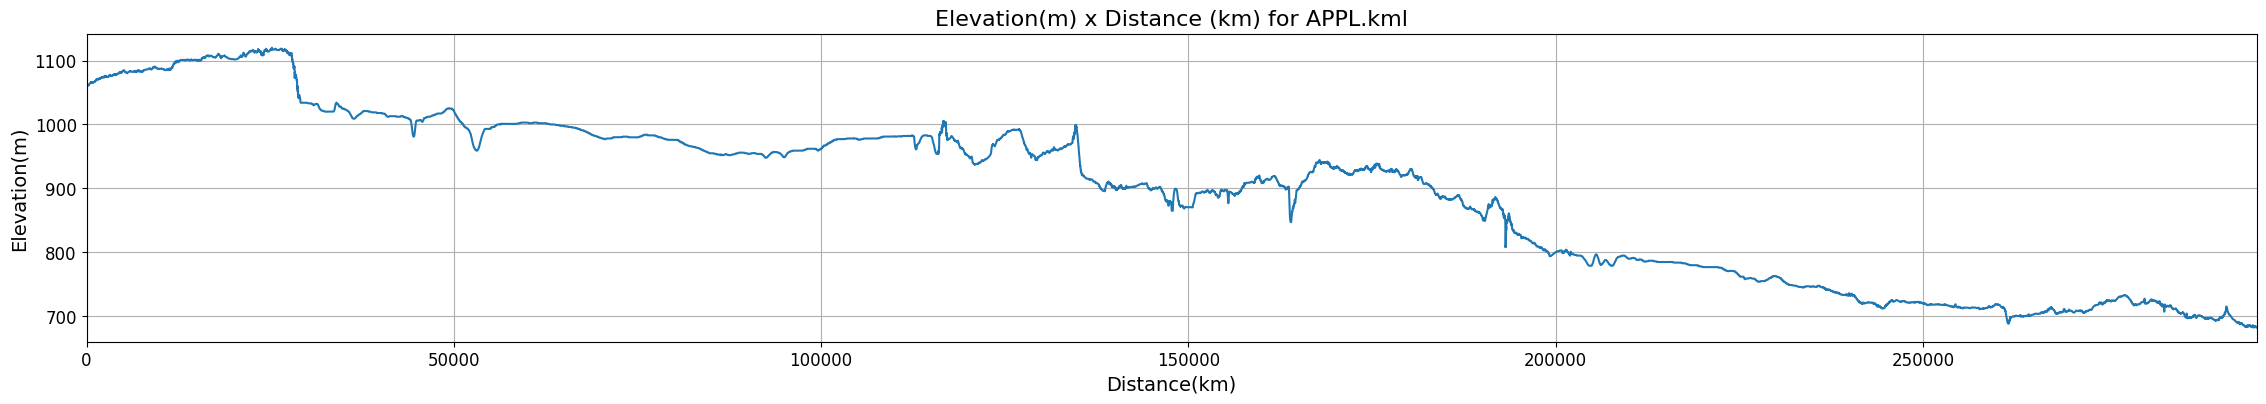

In [4]:
## User changeable area ##
filename_kml = 'APPL.kml'  # File should be in kml folder.
## End of user changeable area ##

load_dotenv()
API_KEY = os.getenv('API_KEY')

geo_df = kml2df(filename_kml)
geo_df = get_elevation_data(geo_df, API_KEY)
geo_df = calculate_distances(geo_df)
write_to_csv(geo_df, filename_kml)
plot_elevation_profile(geo_df, filename_kml, show_plot=True)

In [5]:
geo_df

,Lat,Lon,Elevation[m],Delta_Distance[m],Distance[m]
0,51.068081,-113.900301,1060.436401,2.968590,2.968590
1,51.068108,-113.900300,1060.485596,2.968590,5.937180
2,51.068135,-113.900300,1060.507324,2.968590,8.905771
3,51.068161,-113.900300,1060.509277,2.968590,11.874361
4,51.068188,-113.900299,1060.502930,2.968590,14.842951
...,...,...,...,...,...
115811,53.548706,-113.356949,682.220886,2.020631,295409.098887
115812,53.548724,-113.356950,682.185730,2.020631,295411.119518
115813,53.548742,-113.356950,682.169739,2.020631,295413.140149
115814,53.548761,-113.356950,682.193726,2.020631,295415.160780


# Descriptive Statistics

In [6]:
# Number of data points
num_data_points = len(geo_df)
original_num_data_points = len(kml2df(filename_kml))
print(f"Number of data points (After processing): {num_data_points}, (Original: {original_num_data_points})")

# Total distance of the file
total_distance = geo_df['Distance[m]'].sum()/1000
distance_increment_mean = geo_df['Distance[m]'].mean()
distance_increment_std = geo_df['Distance[m]'].std()
distance_increment_max = np.max(geo_df['Distance[m]'])
distance_increment_min = np.min(geo_df['Distance[m]'])
print(f"Total distance: {total_distance:.2f} km, (Average distance increment: {distance_increment_mean:.2f} m, standard deviation: {distance_increment_std:.2f} m)")
print(f"Max distance: {distance_increment_max:.2f} m, Min distance: {distance_increment_min:.2f} m")

# Maximum and minimum altitudes, average altitude, and standard deviation of the altitude
altitude_stats = geo_df['Elevation[m]'].describe()
print(f"[Altitude] Maximum: {altitude_stats['max']:.2f} m, Minimum: {altitude_stats['min']:.2f} m, Average: {altitude_stats['mean']:.2f} m, Standard Deviation: {altitude_stats['std']:.2f} m")

# Latitude and Longitude statistics
lat_stats = geo_df['Lat'].describe()
lon_stats = geo_df['Lon'].describe()
print(f"[Latitude] Minimum: {lat_stats['min']:.6f}, Maximum: {lat_stats['max']:.6f}")
print(f"[Longitude] Minimum: {lon_stats['min']:.6f}, Maximum: {lon_stats['max']:.6f}")

Number of data points (After processing): 115816, (Original: 283)
Total distance: 16554768.96 km, (Average distance increment: 142940.26 m, standard deviation: 90938.12 m)
Max distance: 295415.16 m, Min distance: 2.97 m
[Altitude] Maximum: 1119.98 m, Minimum: 682.17 m, Average: 895.21 m, Standard Deviation: 124.97 m
[Latitude] Minimum: 51.068081, Maximum: 53.548779
[Longitude] Minimum: -113.920868, Maximum: -113.356765


# Functionality - With Pins

In [ ]:
# Load the pins KML file (optional)
filename_pins_kml = 'pins.kml'
pins = parse_pins(filename_pins_kml)
find_closest_points_for_pins(geo_df, pins)

# Export the DataFrame with pins to the CSV file
write_to_csv(geo_df, filename_kml)

In [ ]:
plot_elevation_profile_with_pins(geo_df, filename_kml, show_plot=True)

# Scatter Plot - Distance x Cumulative Distance
Note: Use this to verify whether or not there are some points in your mesh with unbalanced spaces

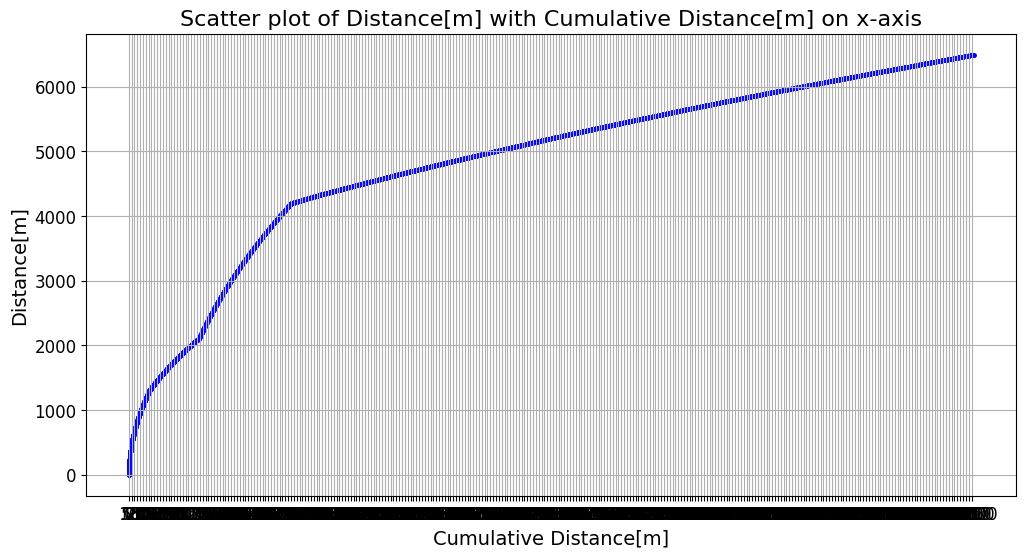

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a DataFrame called geo_df with a 'Distance[Km]' column

# Calculate the cumulative sum of the 'Distance[Km]' column
geo_df['Cumulative_Distance[m]'] = geo_df['Distance[m]'].cumsum()/1000

# Create a scatter plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(geo_df['Cumulative_Distance[m]'], geo_df['Distance[m]'], s=5, c='blue')

# Set plot labels and title
ax.set_xlabel('Cumulative Distance[m]')
ax.set_ylabel('Distance[m]')
ax.set_title('Scatter plot of Distance[m] with Cumulative Distance[m] on x-axis')

# Add gridlines
ax.grid(True)

# Add 50 km markers on the x-axis
max_cumulative_distance = geo_df['Cumulative_Distance[m]'].max()
xticks = np.arange(0, max_cumulative_distance, 50)
ax.set_xticks(xticks)

# Show the plot
plt.show()
